# Categorical Support Vector Classifier

## Imports

In [42]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder 
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report 

## Loading the database

#### Read the csv file and study the database

In [120]:
df = pd.read_csv('mushrooms-full-dataset.csv' , dtype=str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [121]:
# make sure it is balanced
df.poisonous.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64


## Preprocessing

#### Define the target and the inputs

In [122]:
target = df.poisonous
data = df.drop(['poisonous'] , axis=1)

#### Create a training and a testing dataset

In [123]:
X_train , X_test , y_train , y_test = train_test_split(data , target , test_size=0.2 , random_state=365 , stratify=target)

# Check the result from the stratification

In [124]:
y_train.value_counts()

e    3366
p    3133
Name: poisonous, dtype: int64

In [125]:
y_test.value_counts()

e    842
p    783
Name: poisonous, dtype: int64

#### Define a separate encoder for the target and the inputs 

In [126]:
enc_ordinal = OrdinalEncoder()
enc_label = LabelEncoder()

#### Apply the fit_transform() method on the training data and the transform() method on the test data.

In [153]:
X_train_trans = enc_ordinal.fit_transform(X_train)
X_test_trans = enc_ordinal.transform(X_test)

y_train_trans = enc_label.fit_transform(y_train)
y_test_trans = enc_label.transform(y_test)

In [154]:
X_test_trans

array([[2., 3., 8., ..., 2., 4., 5.],
       [3., 3., 2., ..., 7., 4., 2.],
       [5., 0., 3., ..., 1., 5., 0.],
       ...,
       [2., 2., 2., ..., 7., 4., 2.],
       [2., 3., 4., ..., 7., 4., 0.],
       [2., 3., 5., ..., 7., 1., 6.]])

In [155]:
X_test_trans

array([[2., 3., 8., ..., 2., 4., 5.],
       [3., 3., 2., ..., 7., 4., 2.],
       [5., 0., 3., ..., 1., 5., 0.],
       ...,
       [2., 2., 2., ..., 7., 4., 2.],
       [2., 3., 4., ..., 7., 4., 0.],
       [2., 3., 5., ..., 7., 1., 6.]])

## Rescaling

### In order for the SVC to work correctly the inputs need to be rescaled to the range (-1, 1)

In [156]:
scaling2 = MinMaxScaler(feature_range=(-1,1)).fit(X_train_trans)

X_train_rescaled_2 = scaling2.transform(X_train_trans)
X_test_rescaled_2 = scaling2.transform(X_test_trans)

## Classification

In [157]:
C =1
svc2 = svm.SVC(kernel = 'linear' , C=C).fit(X_train_rescaled_2 , y_train_trans)

In [158]:
y_pred_test2 = svc2.predict(X_test_rescaled_2)

In [159]:
y_pred_test2.shape

(1625,)

In [160]:
y_test_trans.shape

(1625,)

## Evaluation

#### Evaluate the model on the test data

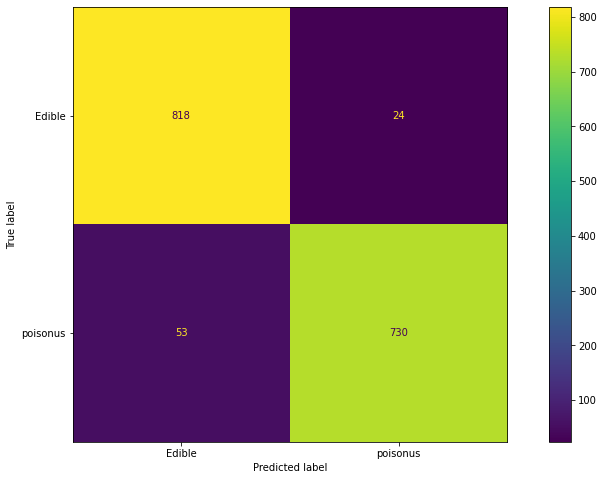

In [161]:
fig , axs = plt.subplots(figsize=(15,8))

cmp = ConfusionMatrixDisplay(confusion_matrix(y_test_trans,y_pred_test2) , display_labels=["Edible" , "poisonus"])
cmp.plot(ax=axs)

In [163]:
print(classification_report(y_test_trans,y_pred_test2 , target_names=["Edible" , "poisonus"]))

              precision    recall  f1-score   support

      Edible       0.94      0.97      0.96       842
    poisonus       0.97      0.93      0.95       783

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



## Hyperparameter Tuning with GridSearchCV

### Choose the best kernel and optimal C parameter based on Cross Validation of the training data

In [1]:
tunned_parameters = [
    {"kernel" : ["linear"] , "C" :[1,12]},
    {"kernel" : ["poly"] , "C":[1,12]},
    {"kernel" : ["rbf"] , "C":[1,12] , "gamma" : [1e-3,1e-4]}
]